In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
# preparing the dataset
image_path=[]
mask_path=[]
df=pd.DataFrame()
root_path='E:\kaggle_3m'
for folder in os.listdir(root_path):
    if folder.startswith('T'):
        for path in os.listdir(root_path+'/'+folder):
            if 'mask' in path:
                mask_path.append(root_path+'/'+folder+'/'+path)
            else:
                image_path.append(root_path+'/'+folder+'/'+path)
                
    elif folder=='data.csv':
        df=pd.read_csv(root_path+'/'+folder)
    else: 
        continue

In [4]:
df

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0    TCGA_CS_4941            2.0                 4.0             2        2.0   
1    TCGA_CS_4942            1.0                 5.0             2        1.0   
2    TCGA_CS_4943            1.0                 5.0             2        1.0   
3    TCGA_CS_4944            NaN                 5.0             2        1.0   
4    TCGA_CS_5393            4.0                 5.0             2        1.0   
..            ...            ...                 ...           ...        ...   
105  TCGA_HT_8563            2.0                 5.0             3        1.0   
106  TCGA_HT_A5RC            2.0                 4.0             2        2.0   
107  TCGA_HT_A616            NaN                 5.0             2        1.0   
108  TCGA_HT_A61A            NaN                 5.0             2        NaN   
109  TCGA_HT_A61B            NaN                 5.0             2        1.0   

     RPPACluster  OncosignCluster  COCCluster  histological_type  \
0            NaN              3.0           2                1.0   
1            1.0              2.0           1                1.0   
2            2.0              2.0           1                1.0   
3            2.0              1.0           1                1.0   
4            2.0              3.0           1                1.0   
..           ...              ...         ...                ...   
105          NaN              2.0           2                1.0   
106          NaN              3.0           2                1.0   
107          NaN              2.0           1                1.0   
108          NaN              NaN           1                3.0   
109          NaN              2.0           1                NaN   

     neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                          2.0                1.0         3.0             2.0   
1                          2.0                1.0         3.0             2.0   
2                          2.0                1.0         1.0             2.0   
3                          1.0                1.0         3.0             6.0   
4                          2.0                1.0         1.0             6.0   
..                         ...                ...         ...             ...   
105                        2.0                1.0         3.0             2.0   
106                        2.0                1.0         1.0             2.0   
107                        1.0                1.0         1.0             2.0   
108                        1.0                1.0         1.0             6.0   
109                        NaN                NaN         NaN             NaN   

     gender  age_at_initial_pathologic  race  ethnicity  death01  
0       2.0                       67.0   3.0        2.0      1.0  
1       1.0                       44.0   2.0        NaN      1.0  
2       2.0                       37.0   3.0        NaN      0.0  
3       2.0                       50.0   3.0        NaN      0.0  
4       2.0                       39.0   3.0        NaN      0.0  
..      ...                        ...   ...        ...      ...  
105     1.0                       30.0   3.0        2.0      0.0  
106     1.0                       70.0   3.0        2.0      1.0  
107     1.0                       36.0   3.0        2.0      0.0  
108     1.0                       20.0   3.0        2.0      0.0  
109     NaN                        NaN   NaN        NaN      NaN  

[110 rows x 18 columns]

In [5]:
patient_id=[id_[67:-4] for id_ in image_path]

In [6]:
def filter(mask_path):
    if np.max(cv2.imread(mask_path))>0.5:
        return 1
    else:
        return 0
df_brain=pd.DataFrame({'Patient_id':patient_id,'Image_path':image_path,'Mask_path':mask_path})
df_brain['Diagnosis']=df_brain['Mask_path'].apply(lambda x: filter(x))

In [7]:
df_brain

Patient_id                                         Image_path  \
0                E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...   
1                E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...   
2                E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...   
3                E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...   
4                E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...   
...         ...                                                ...   
3924             E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...   
3925             E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...   
3926             E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...   
3927             E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...   
3928             E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...   

                                              Mask_path  Diagnosis  
0     E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...          0  
1     E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...          1  
2     E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...          1  
3     E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...          1  
4     E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_494...          1  
...                                                 ...        ...  
3924  E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...          0  
3925  E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...          0  
3926  E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...          0  
3927  E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...          0  
3928  E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61...          0  

[3929 rows x 4 columns]

In [8]:
for i in image_path:
    if folder.startswith('T'):
        for path in os.listdir(root_path+'/'+folder):
            print(i)

E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_1996090

E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_6.tif
E:\kaggle_3m/TCGA_CS_5397_20010315/TCGA_CS_5397_2001031

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_19911220_3.tif
E:\kaggle_3m/TCGA_DU_7018_19911220/TCGA_DU_7018_1991122

E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_4.tif
E:\kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_1991032

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_10.tif
E:\kaggle_3m/TCGA_HT_7680_19970202/TCGA_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_84.tif
E:\kaggle_3m/TCGA_HT_A61B_19991127/TCGA_

In [9]:
cnt=0
total_image=[]
patient_id=[]
for folder in os.listdir(root_path):
    if folder.startswith('T'):
        patient_id.append(folder)
        for path in os.listdir(root_path+'/'+folder):
            if folder in path:
                cnt+=1
        total_image.append(cnt)
        cnt=0

In [10]:
total_image

[46,
 40,
 40,
 40,
 40,
 40,
 48,
 44,
 50,
 48,
 40,
 48,
 52,
 40,
 56,
 44,
 76,
 80,
 72,
 72,
 72,
 52,
 72,
 142,
 76,
 106,
 114,
 102,
 106,
 120,
 116,
 112,
 104,
 116,
 98,
 120,
 72,
 76,
 68,
 64,
 72,
 72,
 70,
 72,
 72,
 84,
 80,
 74,
 74,
 74,
 72,
 72,
 74,
 72,
 76,
 76,
 70,
 112,
 46,
 62,
 72,
 48,
 102,
 52,
 72,
 96,
 120,
 96,
 52,
 54,
 102,
 96,
 120,
 100,
 72,
 146,
 64,
 64,
 40,
 64,
 56,
 60,
 42,
 50,
 40,
 48,
 40,
 42,
 42,
 42,
 64,
 44,
 40,
 60,
 56,
 160,
 64,
 40,
 40,
 64,
 44,
 40,
 44,
 42,
 44,
 46,
 64,
 56,
 176,
 176]

In [11]:
for i in range(110):
    #if patient_id[i] in mask_path[i]:
        print(mask_path[i])

E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_16_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_17_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_19_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_20_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_22_mask.tif
E:\kaggle_3m/TCGA_CS_4941_19960909/

In [12]:
mask_path

['E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_16_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_17_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_18_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_19_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_20_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21_mask.tif',
 'E:\\kaggle_3m/TCGA_CS_4941_19960909/T

In [13]:
cnt=[]
cntblk=[]
cntwhite=[]
white=0
black=0
for file in (patient_id):
    count=0
    white=0
    black=0
    for folder in (mask_path):
        if file in (folder):
            count+=1
        
            if np.max(cv2.imread(folder))>0.5:
                white+=1
            else:
                black+=1
    cnt.append(count)
    cntblk.append(black)
    cntwhite.append(white)

In [14]:
ratio=[]
for i in range(110):
    ratio.append(cntwhite[i]/cnt[i])
print(ratio)

[0.34782608695652173, 0.3, 0.4, 0.45, 0.4, 0.15, 0.4583333333333333, 0.2727272727272727, 0.24, 0.16666666666666666, 0.25, 0.4583333333333333, 0.4230769230769231, 0.4, 0.25, 0.45454545454545453, 0.34210526315789475, 0.325, 0.2222222222222222, 0.19444444444444445, 0.2777777777777778, 0.46153846153846156, 0.4166666666666667, 0.29577464788732394, 0.21052631578947367, 0.3584905660377358, 0.3157894736842105, 0.49019607843137253, 0.3018867924528302, 0.15, 0.27586206896551724, 0.48214285714285715, 0.5384615384615384, 0.46551724137931033, 0.24489795918367346, 0.5, 0.5, 0.2894736842105263, 0.23529411764705882, 0.40625, 0.2222222222222222, 0.25, 0.3142857142857143, 0.3611111111111111, 0.4722222222222222, 0.30952380952380953, 0.225, 0.24324324324324326, 0.13513513513513514, 0.35135135135135137, 0.1388888888888889, 0.3611111111111111, 0.3783783783783784, 0.4166666666666667, 0.3157894736842105, 0.39473684210526316, 0.4, 0.2857142857142857, 0.4782608695652174, 0.3548387096774194, 0.19444444444444445,

In [15]:
df.insert(18, column = "tumor_size", value = ratio)  

In [16]:
df

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0    TCGA_CS_4941            2.0                 4.0             2        2.0   
1    TCGA_CS_4942            1.0                 5.0             2        1.0   
2    TCGA_CS_4943            1.0                 5.0             2        1.0   
3    TCGA_CS_4944            NaN                 5.0             2        1.0   
4    TCGA_CS_5393            4.0                 5.0             2        1.0   
..            ...            ...                 ...           ...        ...   
105  TCGA_HT_8563            2.0                 5.0             3        1.0   
106  TCGA_HT_A5RC            2.0                 4.0             2        2.0   
107  TCGA_HT_A616            NaN                 5.0             2        1.0   
108  TCGA_HT_A61A            NaN                 5.0             2        NaN   
109  TCGA_HT_A61B            NaN                 5.0             2        1.0   

     RPPACluster  OncosignCluster  COCCluster  histological_type  \
0            NaN              3.0           2                1.0   
1            1.0              2.0           1                1.0   
2            2.0              2.0           1                1.0   
3            2.0              1.0           1                1.0   
4            2.0              3.0           1                1.0   
..           ...              ...         ...                ...   
105          NaN              2.0           2                1.0   
106          NaN              3.0           2                1.0   
107          NaN              2.0           1                1.0   
108          NaN              NaN           1                3.0   
109          NaN              2.0           1                NaN   

     neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                          2.0                1.0         3.0             2.0   
1                          2.0                1.0         3.0             2.0   
2                          2.0                1.0         1.0             2.0   
3                          1.0                1.0         3.0             6.0   
4                          2.0                1.0         1.0             6.0   
..                         ...                ...         ...             ...   
105                        2.0                1.0         3.0             2.0   
106                        2.0                1.0         1.0             2.0   
107                        1.0                1.0         1.0             2.0   
108                        1.0                1.0         1.0             6.0   
109                        NaN                NaN         NaN             NaN   

     gender  age_at_initial_pathologic  race  ethnicity  death01  tumor_size  
0       2.0                       67.0   3.0        2.0      1.0    0.347826  
1       1.0                       44.0   2.0        NaN      1.0    0.300000  
2       2.0                       37.0   3.0        NaN      0.0    0.400000  
3       2.0                       50.0   3.0        NaN      0.0    0.450000  
4       2.0                       39.0   3.0        NaN      0.0    0.400000  
..      ...                        ...   ...        ...      ...         ...  
105     1.0                       30.0   3.0        2.0      0.0    0.391304  
106     1.0                       70.0   3.0        2.0      1.0    0.468750  
107     1.0                       36.0   3.0        2.0      0.0    0.392857  
108     1.0                       20.0   3.0        2.0      0.0    0.420455  
109     NaN                        NaN   NaN        NaN      NaN    0.284091  

[110 rows x 19 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [18]:
df.describe()

RNASeqCluster  MethylationCluster  miRNACluster   CNCluster  \
count      92.000000          109.000000    110.000000  108.000000   
mean        2.445652            3.678899      1.900000    1.722222   
std         1.180092            1.169684      0.789263    0.862872   
min         1.000000            1.000000      1.000000    1.000000   
25%         1.000000            3.000000      1.000000    1.000000   
50%         2.000000            4.000000      2.000000    1.000000   
75%         4.000000            5.000000      2.000000    3.000000   
max         4.000000            5.000000      4.000000    3.000000   

       RPPACluster  OncosignCluster  COCCluster  histological_type  \
count    98.000000       105.000000  110.000000         109.000000   
mean      2.367347         1.895238    1.763636           2.128440   
std       1.125045         0.663960    0.855927           0.850935   
min       1.000000         1.000000    1.000000           1.000000   
25%       1.000000         1.000000    1.000000           1.000000   
50%       2.000000         2.000000    1.000000           2.000000   
75%       3.000000         2.000000    3.000000           3.000000   
max       4.000000         3.000000    3.000000           3.000000   

       neoplasm_histologic_grade  tumor_tissue_site  laterality  \
count                 109.000000              109.0  109.000000   
mean                    1.532110                1.0    2.009174   
std                     0.501273                0.0    0.995317   
min                     1.000000                1.0    1.000000   
25%                     1.000000                1.0    1.000000   
50%                     2.000000                1.0    2.000000   
75%                     2.000000                1.0    3.000000   
max                     2.000000                1.0    3.000000   

       tumor_location      gender  age_at_initial_pathologic        race  \
count      109.000000  109.000000                 109.000000  108.000000   
mean         3.513761    1.486239                  45.834862    2.907407   
std          1.863960    0.502119                  13.797151    0.291212   
min          1.000000    1.000000                  20.000000    2.000000   
25%          2.000000    1.000000                  34.000000    3.000000   
50%          2.000000    1.000000                  47.000000    3.000000   
75%          6.000000    2.000000                  58.000000    3.000000   
max          6.000000    2.000000                  75.000000    3.000000   

        ethnicity     death01  tumor_size  
count  102.000000  109.000000  110.000000  
mean     1.970588    0.247706    0.356079  
std      0.169792    0.433674    0.112821  
min      1.000000    0.000000    0.135135  
25%      2.000000    0.000000    0.272727  
50%      2.000000    0.000000    0.356665  
75%      2.000000    0.000000    0.442708  
max      2.000000    1.000000    0.666667

In [19]:
df.duplicated().sum()

0

In [20]:
df.isnull().sum()

Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
tumor_size                    0
dtype: int64

In [21]:
df.replace(np.nan,'0',inplace = True)

In [22]:
df.isnull().sum()

Patient                      0
RNASeqCluster                0
MethylationCluster           0
miRNACluster                 0
CNCluster                    0
RPPACluster                  0
OncosignCluster              0
COCCluster                   0
histological_type            0
neoplasm_histologic_grade    0
tumor_tissue_site            0
laterality                   0
tumor_location               0
gender                       0
age_at_initial_pathologic    0
race                         0
ethnicity                    0
death01                      0
tumor_size                   0
dtype: int64

In [23]:
male=df[df['gender']==1.0]
male.shape[0]

56

In [24]:
female=df[df['gender']==2.0]
female.shape[0]

53

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Plot: gender')

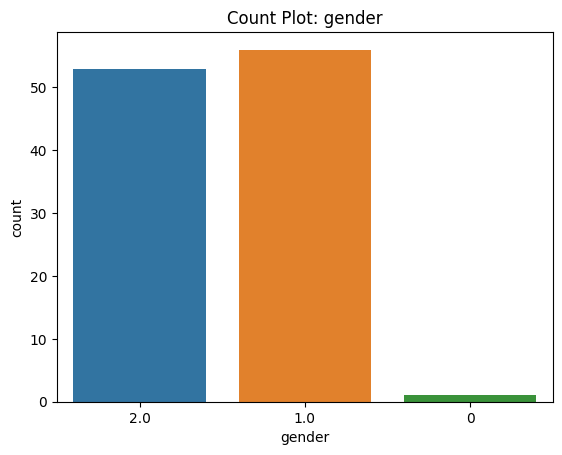

In [29]:
sns.countplot(df['gender'])
plt.title('Count Plot: gender')

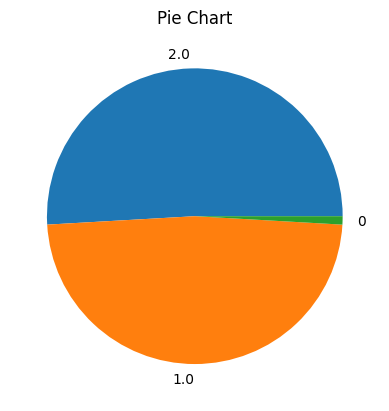

In [30]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].unique())
plt.title('Pie Chart')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatter Plot')

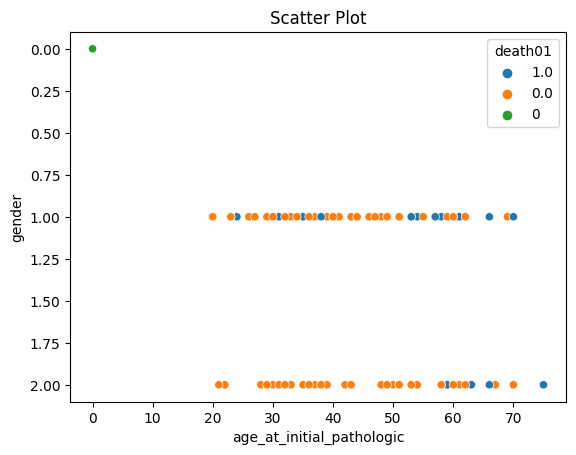

In [31]:
sns.scatterplot(df['age_at_initial_pathologic'], df['gender'], hue = df['death01'])
plt.title('Scatter Plot')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatter Plot')

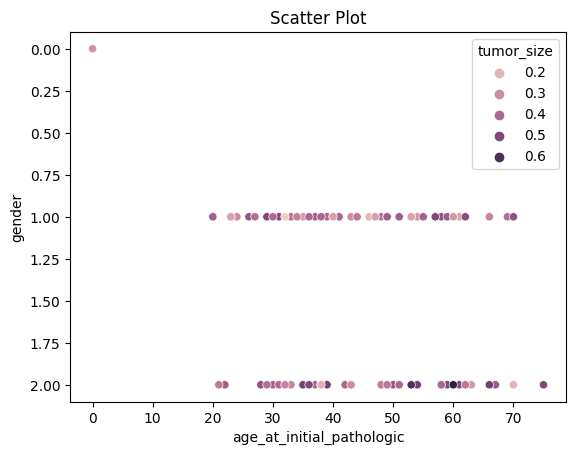

In [32]:
sns.scatterplot(df['age_at_initial_pathologic'], df['gender'], hue = df['tumor_size'])
plt.title('Scatter Plot')

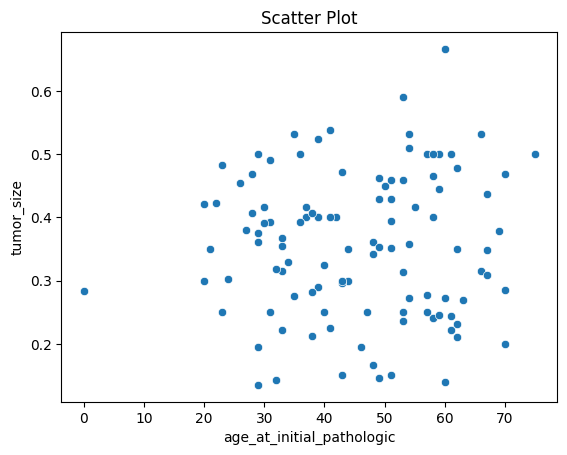

In [33]:
sns.scatterplot(x='age_at_initial_pathologic', y='tumor_size', data=df)
plt.title('Scatter Plot')
plt.show()

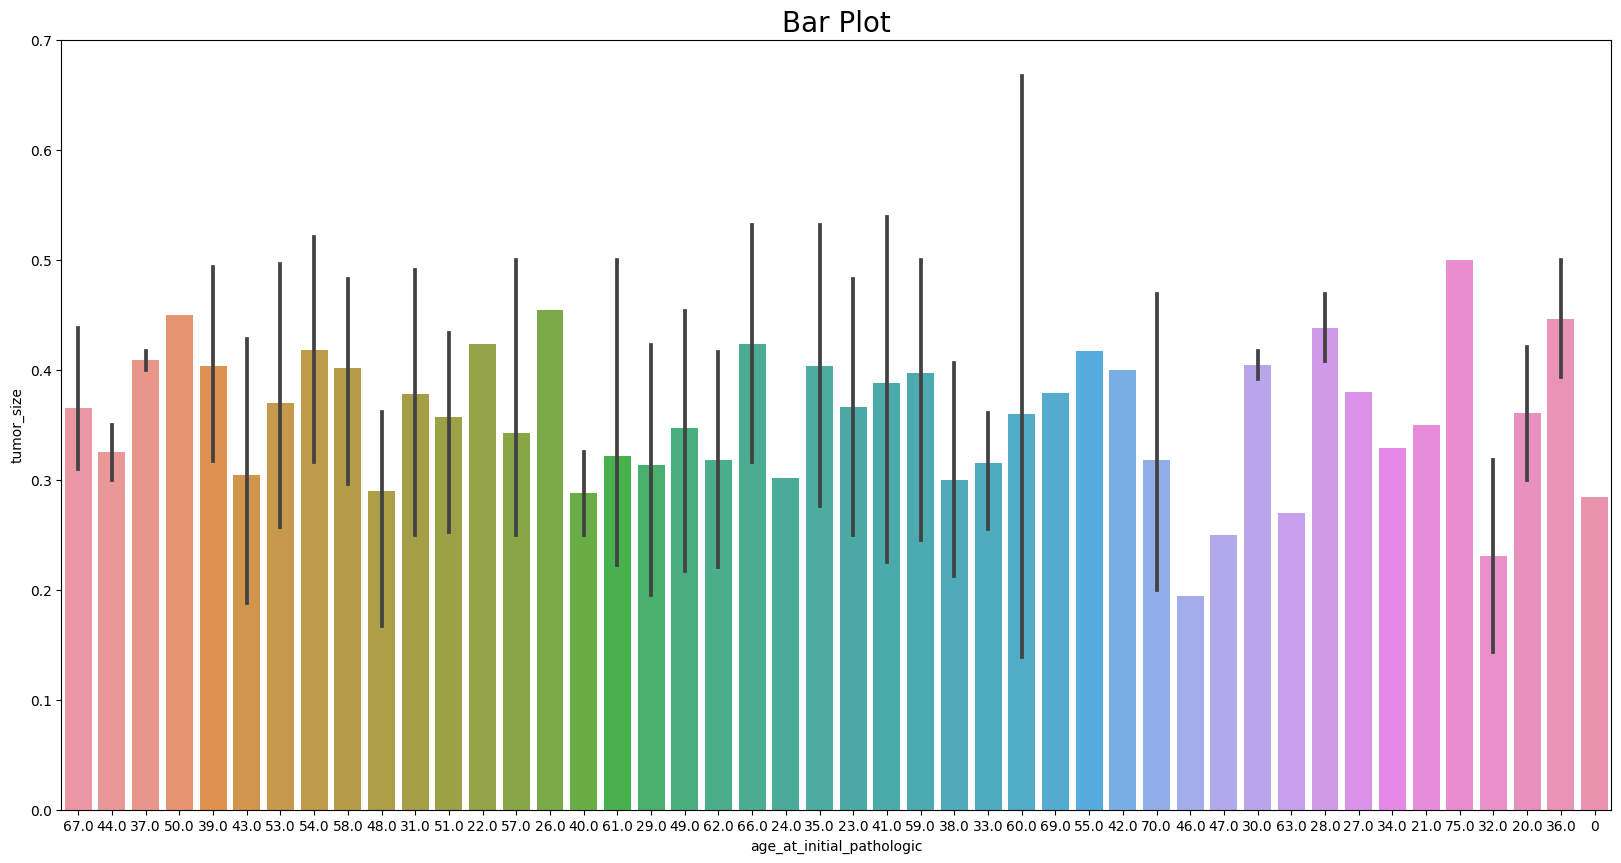

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='age_at_initial_pathologic', y='tumor_size', data=df)
plt.title('Bar Plot', size=20)
plt.show()

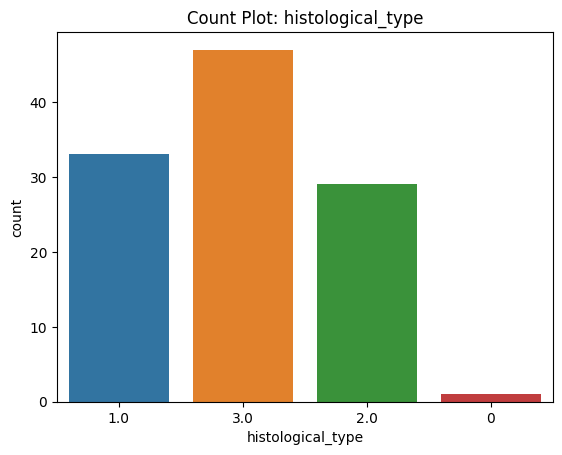

In [35]:
sns.countplot(x='histological_type', data=df)
plt.title('Count Plot: histological_type')
plt.show()

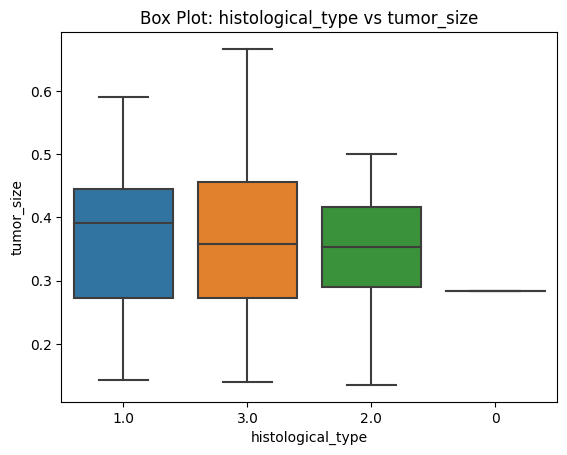

In [36]:
sns.boxplot(x='histological_type', y='tumor_size', data=df)
plt.title('Box Plot: histological_type vs tumor_size')
plt.show()

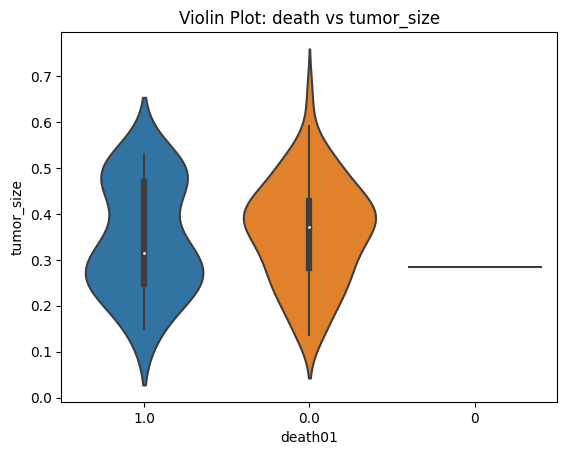

In [37]:
sns.violinplot(x='death01', y='tumor_size', data=df)
plt.title('Violin Plot: death vs tumor_size')
plt.show()

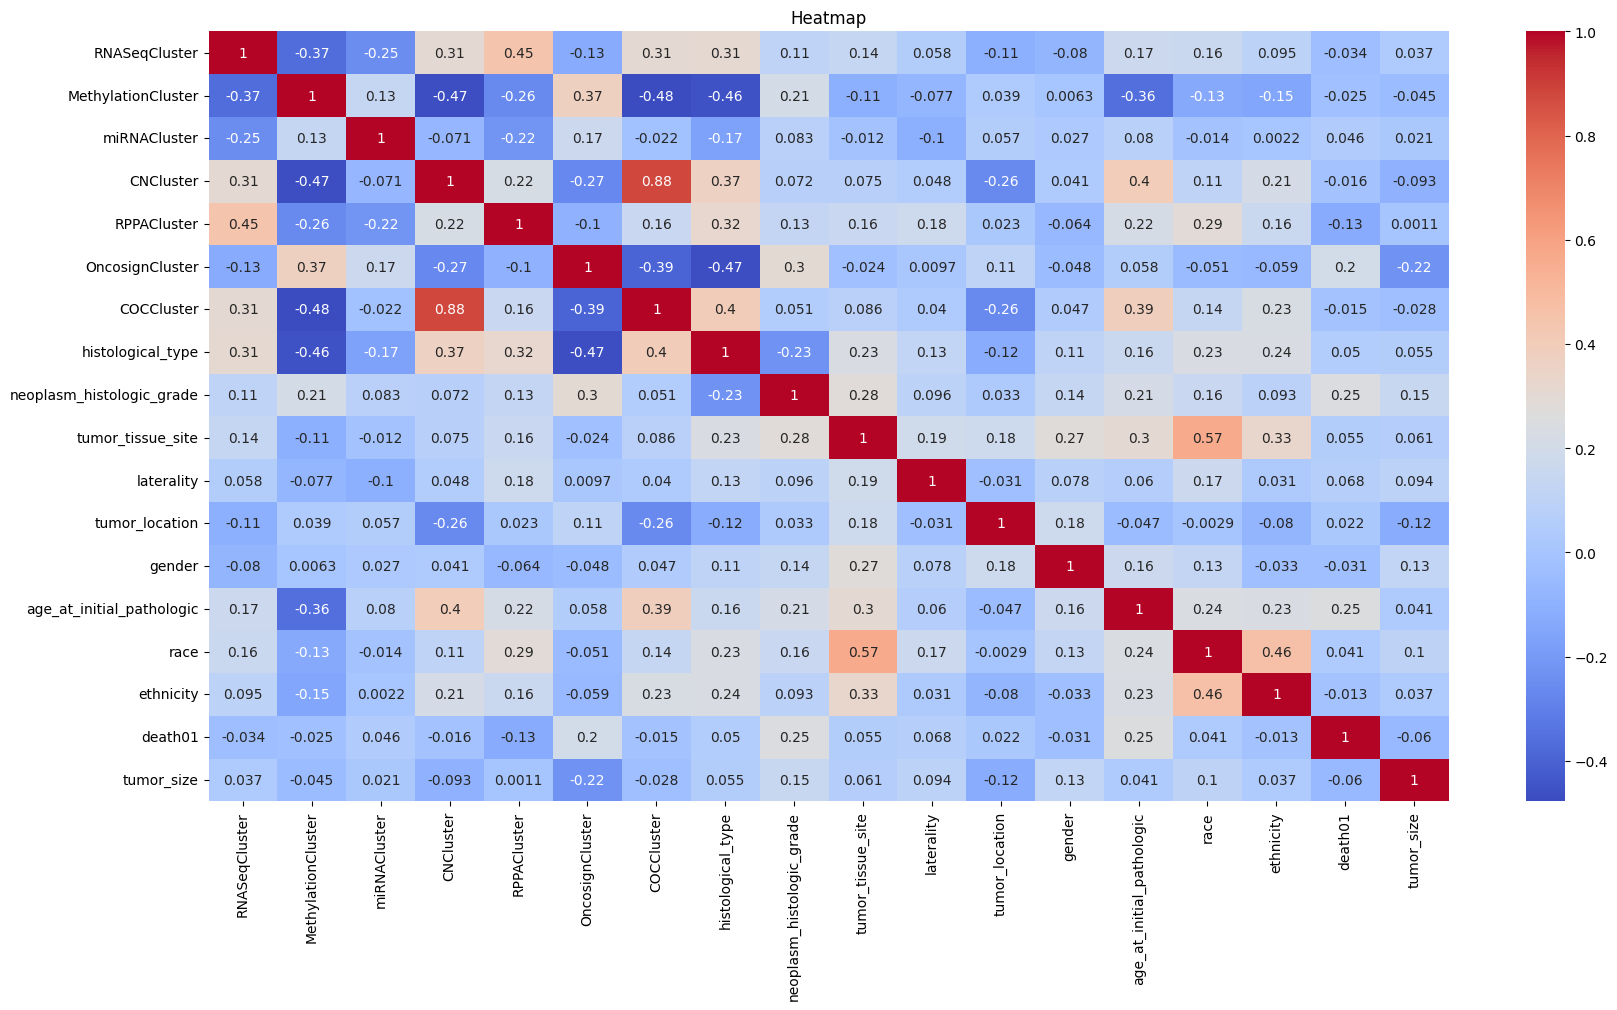

In [38]:
correlation_matrix = df.iloc[0:,1:].corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

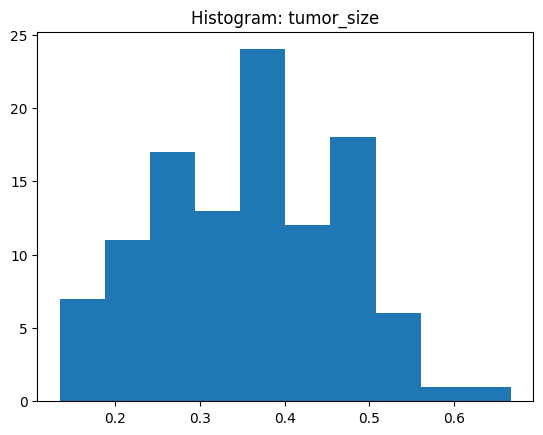

In [39]:
plt.hist(df['tumor_size'], bins=10)
plt.title('Histogram: tumor_size')
plt.show()

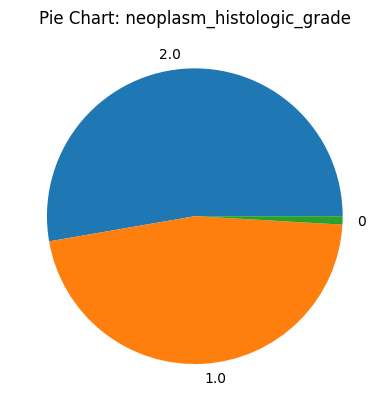

In [40]:
plt.pie(df['neoplasm_histologic_grade'].value_counts(), labels=df['neoplasm_histologic_grade'].unique())
plt.title('Pie Chart: neoplasm_histologic_grade')
plt.show()

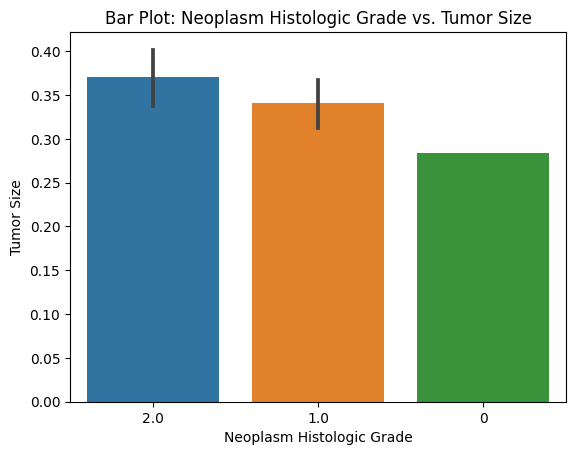

In [41]:
sns.barplot(x='neoplasm_histologic_grade', y='tumor_size', data=df)
plt.xlabel('Neoplasm Histologic Grade')
plt.ylabel('Tumor Size')
plt.title('Bar Plot: Neoplasm Histologic Grade vs. Tumor Size')
plt.show()

In [42]:
OncosignCluster = np.array(df['OncosignCluster'])

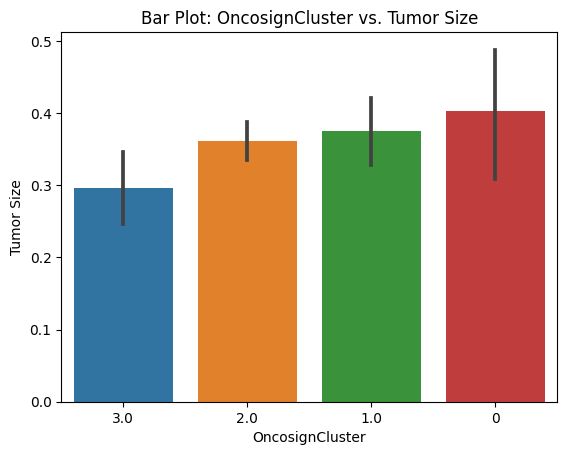

In [43]:
sns.barplot(x=OncosignCluster, y='tumor_size', data=df)
plt.xlabel('OncosignCluster')
plt.ylabel('Tumor Size')
plt.title('Bar Plot: OncosignCluster vs. Tumor Size')
plt.show()

In [46]:
# Import libraries
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px

# Create the Dash app
app = Dash()

# Set up the app layout
geo_dropdown = dcc.Dropdown(options=df['Patient'].unique(),
                            value=df['Patient'])

app.layout = html.Div(children=[
    html.H1(children='Avocado Prices Dashboard'),
    geo_dropdown,
    dcc.Graph(id='price-graph')
])


# Set up the callback function
@app.callback(
    Output(component_id='price-graph', component_property='figure'),
    Input(component_id=geo_dropdown, component_property='value')
)
def update_graph(selected_geography):
    filtered_avocado = df[df['Patient'] == selected_geography]
    line_fig = px.line(filtered_avocado,
                       x='date', y='average_price',
                       color='type',
                       title=f'Avocado Prices in {selected_geography}')
    return line_fig


# Run local server
if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


SystemExit: 1

In [47]:
%tb

SystemExit: 1